### Airline Fleet Analysis

In [108]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Loading the dataset
df = pd.read_csv("Airline_Data.csv")

In [110]:
# Getting general dataset info
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parent Airline        1583 non-null   object 
 1   Airline               1583 non-null   object 
 2   Aircraft Type         1583 non-null   object 
 3   Current               859 non-null    float64
 4   Future                188 non-null    float64
 5   Historic              1113 non-null   float64
 6   Total                 1484 non-null   float64
 7   Orders                348 non-null    float64
 8   Unit Cost             1548 non-null   object 
 9   Total Cost (Current)  1556 non-null   object 
 10  Average Age           820 non-null    float64
dtypes: float64(6), object(5)
memory usage: 136.2+ KB


In [111]:
# Getting the number of missing values for each column 
print("Missing Values:\n")
df.isnull().sum()

Missing Values:



Parent Airline             0
Airline                    0
Aircraft Type              0
Current                  724
Future                  1395
Historic                 470
Total                     99
Orders                  1235
Unit Cost                 35
Total Cost (Current)      27
Average Age              763
dtype: int64

In [112]:
# Getting basic stats
print("Basic Statistics:\n")
df.describe()

Basic Statistics:



,Current,Future,Historic,Total,Orders,Average Age
count,859.000000,188.000000,1113.000000,1484.000000,348.000000,820.000000
mean,24.033760,3.382979,14.513028,24.955526,26.419540,10.115000
std,41.091234,4.656331,23.763373,46.651526,43.024179,6.859362
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000
25%,5.000000,1.000000,3.000000,4.000000,5.000000,5.000000
50%,12.000000,2.000000,7.000000,11.000000,13.500000,8.900000
75%,26.500000,4.000000,16.000000,27.000000,28.250000,14.500000
max,718.000000,38.000000,325.000000,952.000000,400.000000,39.000000


In [113]:
# Updating column names to be more descriptive and intuitive
df.rename(columns={
    'Current': 'Current Fleet',
    'Future': 'Future Deliveries',
    'Historic': 'Retired Aircraft',
    'Total': 'Aircraft Count'
}, inplace=True) # I used inplace to upadte the dataframe (no need to use df = df.rename())


In [117]:
# Checking out the first five rows
df.head() 

,Parent Airline,Airline,Aircraft Type,Current Fleet,Future Deliveries,Retired Aircraft,Aircraft Count,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


In [118]:
# Removing $ signs and commas from 'Unit Cost' and 'Total Cost (Current)'
df['Unit Cost'] = (
    df['Unit Cost']
    .str.replace('$', '')   # remove dollar signs
    .str.replace(',', '')   # remove commas
    .replace('', np.nan) # replacing any empty cell with "not a number"
    .astype(float)          # convert to float
)

df['Total Cost (Current)'] = (
    df['Total Cost (Current)']
    .str.replace('$', '')
    .str.replace(',', '')
    .replace('', np.nan) 
    .astype(float)
)
df.head()

,Parent Airline,Airline,Aircraft Type,Current Fleet,Future Deliveries,Retired Aircraft,Aircraft Count,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,115.0,919.0,10.3


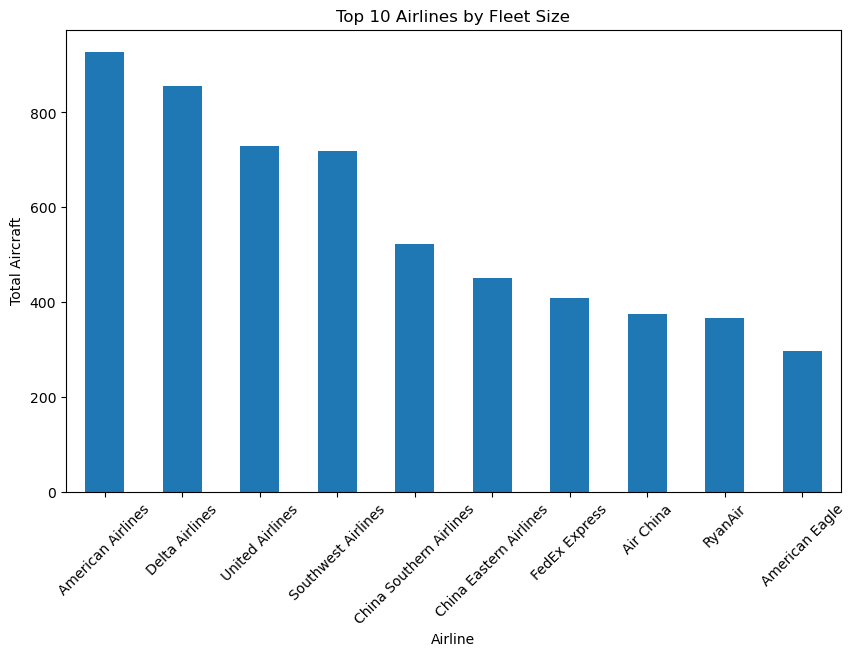

In [119]:
# Top 10 Airlines (by Fleet Size)
plt.figure(figsize=(10,6))

fleet_by_airline = df.groupby('Airline')['Current Fleet'].sum().sort_values(ascending=False).head(10)
fleet_by_airline.plot(kind='bar', title='Top 10 Airlines by Fleet Size')
plt.ylabel('Total Aircraft')
plt.xticks(rotation=45)
plt.show()

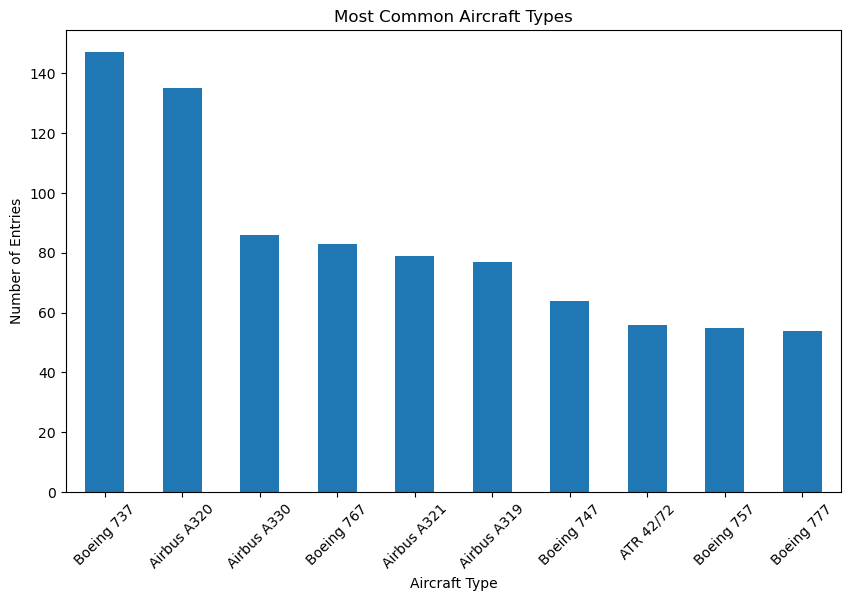

In [120]:
# Most Common Aircraft Types
plt.figure(figsize=(10,6))

most_common_aircraft = df['Aircraft Type'].value_counts().head(10)
most_common_aircraft.plot(kind='bar', title='Most Common Aircraft Types')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

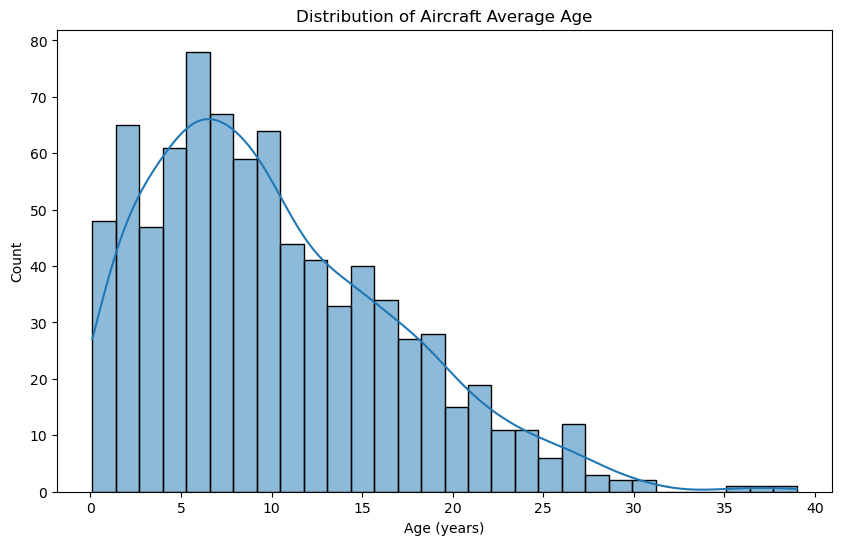

In [121]:
# Distribution of Aircraft Age
plt.figure(figsize=(10,6))

sns.histplot(df['Average Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Aircraft Average Age')
plt.xlabel('Age (years)')
plt.show()

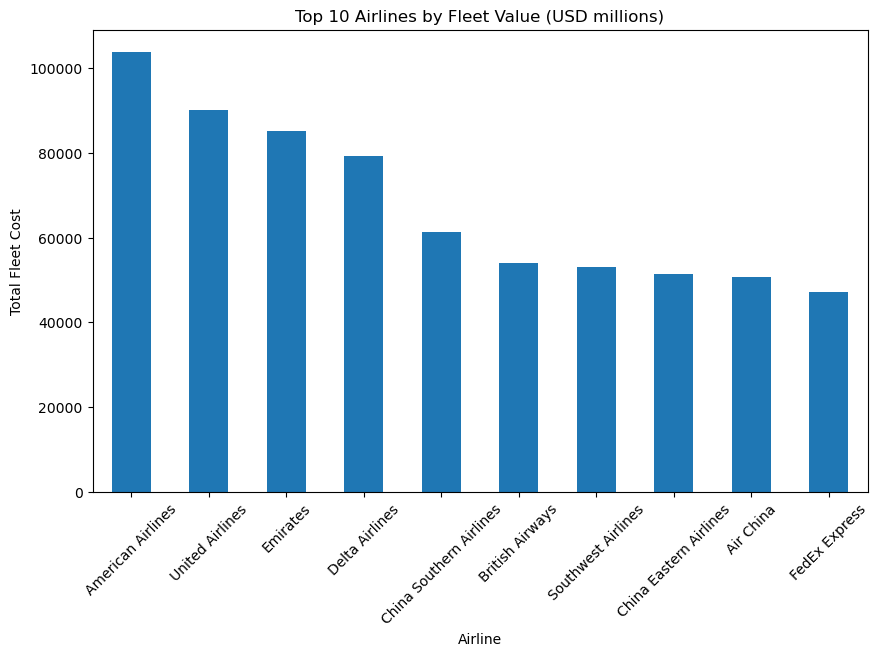

In [122]:
# Top Airlines by Fleet Value
plt.figure(figsize=(10,6))

fleet_value = df.groupby('Airline')['Total Cost (Current)'].sum().sort_values(ascending=False).head(10)
fleet_value.plot(kind='bar', title='Top 10 Airlines by Fleet Value (USD millions)')
plt.ylabel('Total Fleet Cost')
plt.xticks(rotation=45)
plt.show()

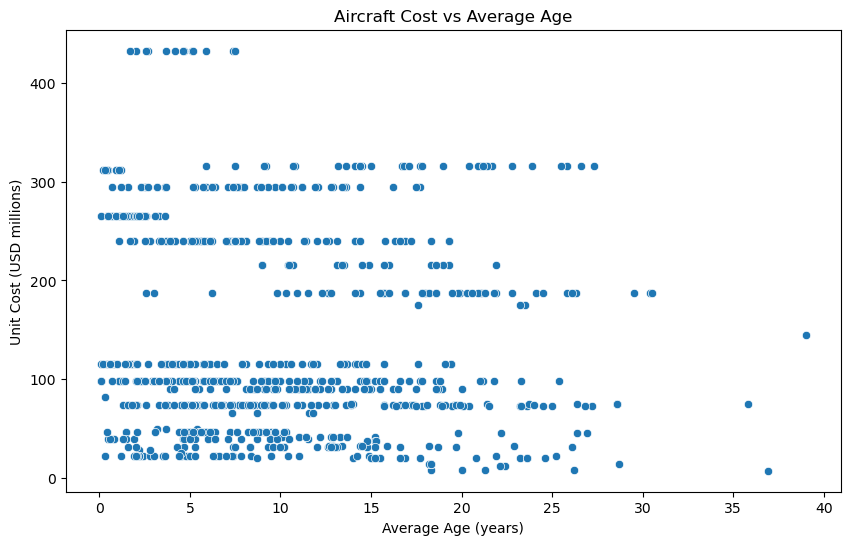

In [123]:
# Aircraft Cost vs Age scatterplot
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x='Average Age', y='Unit Cost')
plt.title('Aircraft Cost vs Average Age')
plt.xlabel('Average Age (years)')
plt.ylabel('Unit Cost (USD millions)')
plt.show()